# WindSE Grid Convergence Example
**Jordan Perr-Sauer, CSCI5636, Fall 2021**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

## WindSE Background

WindSE is a tool developed by NREL based on Fenics. It solves the Navier-Stokes equations to estimate the power output of a wind farm, given inflow conditions, topology of the terrain, and the location and characteristics of the wind turbines. The tool was developed to aid in the optimization of wind farm layouts.

## WindSE API

!windse run -p domain:nx:50 -p domain:ny:50 convergence-2D-3-Turbine-0x.yaml


params = df.Initialize("convergence-2D-3-Turbine-0x.yaml")
dom, farm = df.BuildDomain(params)
problem = df.BuildProblem(params,dom,farm)
solver = df.BuildSolver(params,problem)


total_dofs = [results[i]["problem"].fs.W.dim() for i in range(len(results))]

# 2D Wind Farm with 3 Turbines

## Run Experiments

First, make sure the output directory is empty. Then, you can run the experiments from the command line:

```python experiment_2d.py```

Experiment_2d:
- For the 2D 3 Turbine Example
- nx-ny in 10...150
- inflow angle in []
- power calculation in [power_2d, power_2.5d]


## Examine Experiment Output

### Meshes

The meshes are displayed through ParaView. We can observe the automatic cylindrical refinement around the turbine locations.

<img src="static/exp1-mesh-n10.png" width=200 height=200 />
<img src="static/exp1-mesh-n50.png" width=200 height=200 />
<img src="static/exp1-mesh-n100.png" width=200 height=200 />

### Steady State Solution

<img src="static/exp1-velocity-n100.png" width=600 height=400 />

## Convergence of Power Output

Here, the power output is computed for each of the three turbines.

In [71]:
import experiment_2d
df = experiment_2d.get_results()

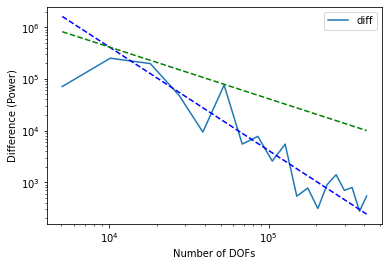

In [72]:
df["diff"] = df["sum"].diff().abs()

df.plot(x="dofs", y="diff", logx=True, logy=True)
plt.xlabel("Number of DOFs")
plt.ylabel("Difference (Power)")
x = df["dofs"][1:]
plt.plot(x, (x.max()*10**8)/x**2, "b--", label="1/x^2")
plt.plot(x, (x.max()*10**4)/x, "g--", label="1/x")
plt.show()

### Two Inflow Angles

Here, we run the same experimental setup between nx=[60,200] and for two different inflow conditions. We expect that the model should converge at the same rate $x^2$ for both inflow cases.

<img src="static/exp2-velocity.png" width=300 height=300 />

In [67]:
import experiment_2d_options
df = experiment_2d_options.get_results()

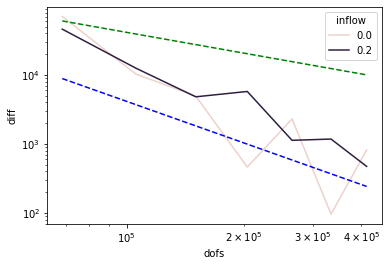

In [70]:
df["diff"] = df.sort_values("dofs").groupby("inflow")["sum"].diff().abs()

sns.lineplot(data=df, x="dofs", y="diff", hue="inflow")
plt.xscale("log")
plt.yscale("log")
x = df["dofs"][2:]
plt.plot(x, (x.max()*10**8)/x**2, "b--", label="1/x^2")
plt.plot(x, (x.max()*10**4)/x, "g--", label="1/x")
